In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# Global superstore

In [2]:
df = pd.read_csv('Global-Superstore.csv', parse_dates=['Order Date'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## 1. 월별 구매건수/구매금액(합산) 그래프 그리기

In [4]:
df2 = pd.DataFrame(df.groupby('Order Date').count()['Row ID'])
df2['매출'] = df.groupby('Order Date').sum()['Sales']
df2.columns = ['구매건수','매출']
df2

,구매건수,매출
Order Date,,
2011-01-01,6,808.56300
2011-01-02,1,314.22000
2011-01-03,20,4503.53720
2011-01-04,16,2808.87024
2011-01-05,7,3662.31000
...,...,...
2014-12-27,54,13421.26376
2014-12-28,13,1647.17400
2014-12-29,116,25109.28878


In [5]:
df3 = df2.resample('M').sum()

In [6]:
g3 = df3.groupby(pd.Grouper( freq='Y'))
dfs3 = [group for _,group in g3]
dfs3

[            구매건수            매출
 Order Date                    
 2011-01-31   433   98898.48886
 2011-02-28   378   91152.15698
 2011-03-31   539  145729.36736
 2011-04-30   564  116915.76418
 2011-05-31   566  146747.83610
 2011-06-30   917  215207.38022
 2011-07-31   495  115510.41912
 2011-08-31   878  207581.49122
 2011-09-30  1052  290214.45534
 2011-10-31   774  199071.26404
 2011-11-30  1139  298496.53752
 2011-12-31  1263  333925.73460,
             구매건수            매출
 Order Date                    
 2012-01-31   539  135780.72024
 2012-02-29   429  100510.21698
 2012-03-31   662  163076.77116
 2012-04-30   657  161052.26952
 2012-05-31   840  208364.89124
 2012-06-30  1136  256175.69842
 2012-07-31   659  145236.78512
 2012-08-31  1083  303142.94238
 2012-09-30  1223  289389.16564
 2012-10-31   990  252939.85020
 2012-11-30  1460  323512.41690
 2012-12-31  1284  338256.96660,
             구매건수            매출
 Order Date                    
 2013-01-31   709  199185.90738
 2013-

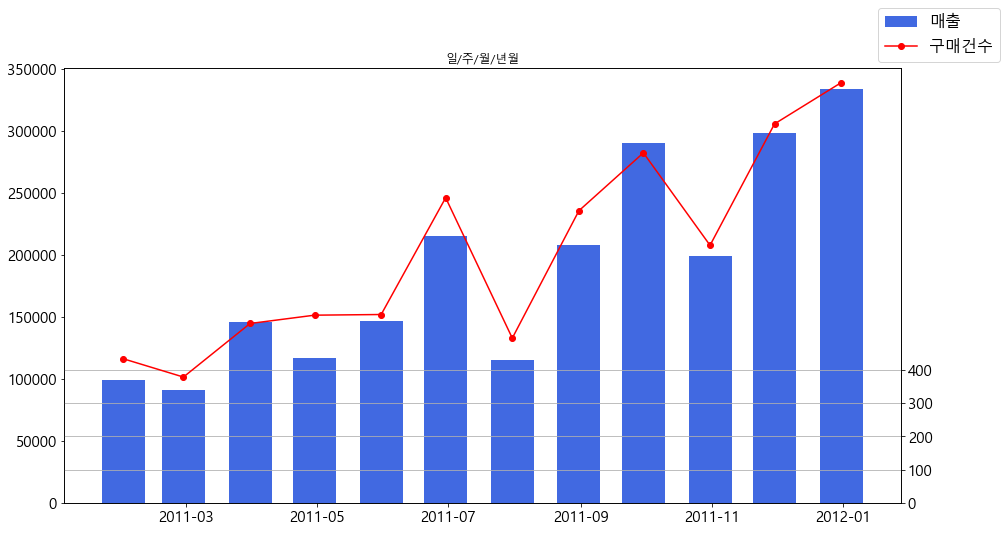

In [7]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)

# dfs3[i]의 i를 바꾸면서 그림가능
ax1.bar(dfs3[0].index, dfs3[0]['매출'], color='royalblue',label='매출', width=20) 
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
ax2.plot(dfs3[0].index, dfs3[0]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*100 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

## 2. 누적 구매횟수별 분석 -> Stacked Bar 로 시각화

In [8]:
df_user = pd.DataFrame(df.groupby(['Customer ID']).count()['Sales'])
df_user['매출'] = df.groupby(['Customer ID']).sum()['Sales']
df_user.columns = ['유저별 총 구매횟수','매출']
df_user

,유저별 총 구매횟수,매출
Customer ID,,
AA-10315,42,13747.41300
AA-10375,42,5884.19500
AA-10480,38,17695.58978
AA-10645,73,15343.89070
AA-315,8,2243.25600
...,...,...
YS-21880,54,18703.60600
ZC-11910,1,7.17300
ZC-21910,84,28472.81926


In [9]:
# 원본데이터와 합친다.
df_user_final = pd.merge(df,df_user, on=['Customer ID']) # 고객명이 키가 된다.
df_user_final.drop(['매출'],axis=1,inplace=True) # 매출 컬럼은 삭제
df_user_final['주문년도/월'] = df_user_final['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df_user_final['주문년도/월'] = pd.to_datetime(df_user_final['주문년도/월'])
df_user_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,유저별 총 구매횟수,주문년도/월
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,49,2012-07-01
1,32299,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Tables,"Bevis Round Bullnose 29"" High Table Top",1090.782,7,0.4,-290.8752,348.180,Critical,49,2012-07-01
2,9345,US-2013-116771,2013-05-01,2013-05-01,Same Day,RH-19495,Rick Hansen,Consumer,La Vega,La Vega,...,Chairs,"SAFCO Rocking Chair, Red",503.664,7,0.2,138.4040,131.219,Critical,49,2013-05-01
3,12338,ES-2013-5957121,2013-09-14,2013-09-15,First Class,RH-19495,Rick Hansen,Consumer,Pamplona,Navarra,...,Chairs,"Office Star Steel Folding Chair, Black",714.240,10,0.2,-178.5600,89.850,Medium,49,2013-09-01
4,4695,MX-2014-135069,2014-10-14,2014-10-19,Standard Class,RH-19495,Rick Hansen,Consumer,Cuiabá,Mato Grosso,...,Chairs,"Harbour Creations Executive Leather Armchair, Red",1268.960,4,0.0,583.6800,89.520,Medium,49,2014-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,42031,MO-2013-5910,2013-11-28,2013-12-02,Standard Class,BD-1500,Bradley Drucker,Consumer,Larache,Tanger-Tétouan,...,Furnishings,"Rubbermaid Stacking Tray, Black",25.200,1,0.0,7.8000,2.340,Medium,3,2013-11-01
51286,45689,ZI-2013-7080,2013-07-30,2013-08-05,Standard Class,BD-1500,Bradley Drucker,Consumer,Bulawayo,Bulawayo,...,Furnishings,"Deflect-O Door Stop, Erganomic",12.771,1,0.7,-22.1490,1.110,Medium,3,2013-07-01
51287,45910,HU-2012-5560,2012-12-20,2012-12-25,Standard Class,RC-9825,Roy Collins,Consumer,Budapest,Budapest,...,Labels,"Harbour Creations Shipping Labels, Adjustable",37.440,4,0.0,0.0000,1.760,Medium,1,2012-12-01
51288,45182,TU-2013-2480,2013-12-23,2013-12-23,Same Day,MG-7890,Michael Granlund,Home Office,Istanbul,Istanbul,...,Accessories,"Logitech Numeric Keypad, Programmable",19.128,1,0.6,-22.4820,1.710,Medium,1,2013-12-01


In [10]:
df_user_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [11]:
df_user2 = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['Sales'])
df_user3 = df_user2.unstack().T
df_user3 = df_user3.fillna(0) # 결측치 0 대입
df_user3

주문년도/월            2011-01-01  2011-02-01  2011-03-01  2011-04-01  2011-05-01  \
      유저별 총 구매횟수                                                               
Sales 1               0.0000        0.00        0.00       0.000      0.0000   
      2               0.0000        0.00        0.00       0.000      0.0000   
      3               0.0000        0.00        0.00       0.000     25.2900   
      4              95.1000        0.00     1619.10       0.000      0.0000   
      5              14.1900      373.62       29.49     698.760      0.0000   
...                      ...         ...         ...         ...         ...   
      85            200.7945        0.00        0.00     526.960    470.9799   
      89              0.0000        0.00        0.00       0.000      0.0000   
      90              0.0000        0.00        0.00     101.728      0.0000   
      94              0.0000        0.00        0.00     662.327      0.0000   
      97             31.5000        0.00        0.00    2774.523      0.0000   

주문년도/월            2011-06-01  2011-07-01  2011-08-01  2011-09-01  2011-10-01  \
      유저별 총 구매횟수                                                               
Sales 1                0.000       0.000      0.0000      81.432       0.000   
      2                0.000       0.000      0.0000       0.000       0.000   
      3                0.000       0.000     10.4100       0.000     129.528   
      4                0.000     229.062     34.8000     135.960       0.000   
      5              559.620       0.000     58.1700     566.988       0.000   
...                      ...         ...         ...         ...         ...   
      85               0.000       0.000   1123.7520    3782.880       0.000   
      89            1129.465       0.000      0.0000       0.000       0.000   
      90            1251.030       0.000    136.1034      23.490     107.440   
      94            1837.800       0.000      0.0000     325.800       0.000   
      97               0.000       0.000      0.0000       0.000       0.000   

주문년도/월            ...  2014-03-01  2014-04-01  2014-05-01  2014-06-01  \
      유저별 총 구매횟수  ...                                                   
Sales 1           ...       0.000       0.000      0.0000      7.1730   
      2           ...       0.000       0.000      0.0000      0.0000   
      3           ...       0.000      58.377    142.2720     21.4800   
      4           ...       0.000     589.200    239.7600    197.3670   
      5           ...     496.110     512.580   1321.8000    125.1840   
...               ...         ...         ...         ...         ...   
      85          ...     333.700       0.000   1969.0977      0.0000   
      89          ...       0.000       0.000      0.0000      0.0000   
      90          ...      67.380    1927.740    538.0200   1340.5533   
      94          ...    4329.359       0.000      0.0000    948.3000   
      97          ...      73.800     484.810      0.0000    452.9520   

주문년도/월            2014-07-01  2014-08-01  2014-09-01  2014-10-01  2014-11-01  \
      유저별 총 구매횟수                                                               
Sales 1                0.000       0.000      0.0000       0.000     0.00000   
      2                0.000       0.000      0.0000       0.000     0.00000   
      3              241.320      50.520      0.0000      16.128  1646.04000   
      4               15.777       0.000    646.2600       0.000   882.12000   
      5               45.978    2015.598    567.4140     602.340   189.48000   
...                      ...         ...         ...         ...         ...   
      85            1161.450     266.760    128.3388      30.336  1983.63128   
      89               0.000     680.660      0.0000     646.260   646.14000   
      90               0.000     736.614      0.0000     106.020   377.85200   
      94             408.960       0.000  10707.5124    1736.539    24.35400   
      97

In [12]:
df2011_1 = df_user3.iloc[:,:12]
df2011_1

주문년도/월            2011-01-01  2011-02-01  2011-03-01  2011-04-01  2011-05-01  \
      유저별 총 구매횟수                                                               
Sales 1               0.0000        0.00        0.00       0.000      0.0000   
      2               0.0000        0.00        0.00       0.000      0.0000   
      3               0.0000        0.00        0.00       0.000     25.2900   
      4              95.1000        0.00     1619.10       0.000      0.0000   
      5              14.1900      373.62       29.49     698.760      0.0000   
...                      ...         ...         ...         ...         ...   
      85            200.7945        0.00        0.00     526.960    470.9799   
      89              0.0000        0.00        0.00       0.000      0.0000   
      90              0.0000        0.00        0.00     101.728      0.0000   
      94              0.0000        0.00        0.00     662.327      0.0000   
      97             31.5000        0.00        0.00    2774.523      0.0000   

주문년도/월            2011-06-01  2011-07-01  2011-08-01  2011-09-01  2011-10-01  \
      유저별 총 구매횟수                                                               
Sales 1                0.000       0.000      0.0000      81.432       0.000   
      2                0.000       0.000      0.0000       0.000       0.000   
      3                0.000       0.000     10.4100       0.000     129.528   
      4                0.000     229.062     34.8000     135.960       0.000   
      5              559.620       0.000     58.1700     566.988       0.000   
...                      ...         ...         ...         ...         ...   
      85               0.000       0.000   1123.7520    3782.880       0.000   
      89            1129.465       0.000      0.0000       0.000       0.000   
      90            1251.030       0.000    136.1034      23.490     107.440   
      94            1837.800       0.000      0.0000     325.800       0.000   
      97               0.000       0.000      0.0000       0.000       0.000   

주문년도/월            2011-11-01  2011-12-01  
      유저별 총 구매횟수                          
Sales 1                0.000       0.000  
      2                0.000       0.000  
      3              817.584      46.266  
      4               53.220       0.000  
      5             1546.200     461.910  
...                      ...         ...  
      85            2186.088    1995.615  
      89              94.732     929.920  
      90             447.908       0.000  
      94               0.000       0.000  
      97              88.776     487.679  

[88 rows x 12 columns]

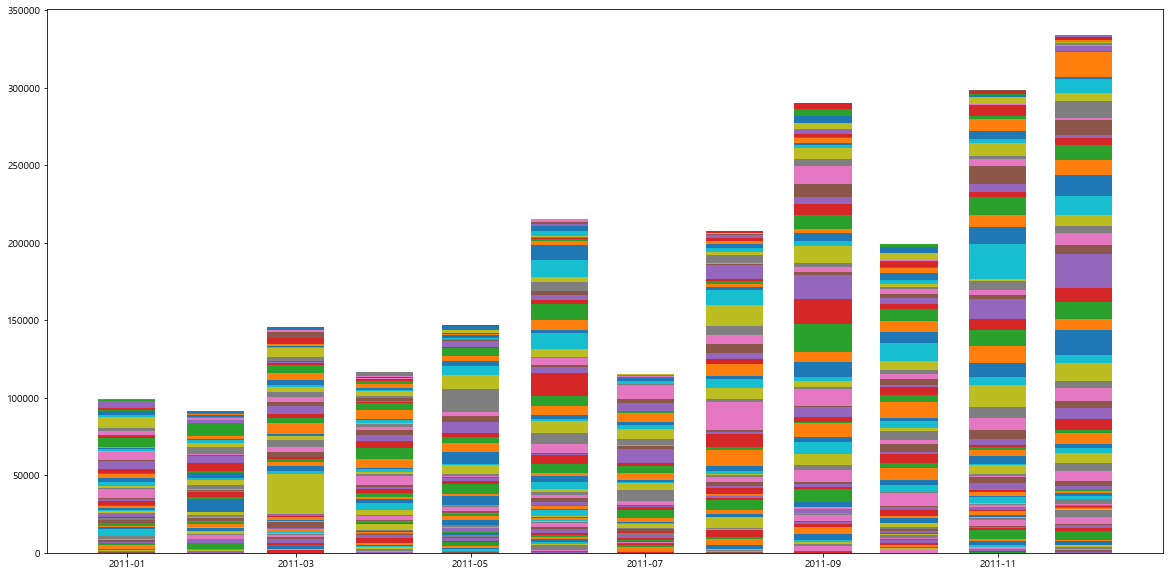

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(df2011_1.columns, df2011_1.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,88) :
    ax.bar(df2011_1.columns, df2011_1.iloc[i,:],width=width, bottom=df2011_1.iloc[0:i,:].sum(axis=0))

plt.show()

## 3. 구매횟수별 분석 -> Stacked Bar 로 시각화
- 2번에서는 유저당 누적 등장횟수로 그림을 그렸다면, 여기서는 등장할때마다 번호를 매겨 매 구매 건에 대해 랭크를 매김

In [14]:
df['Rank'] = df.groupby('Customer ID')['Order Date'].rank(method='min')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Rank
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,11.0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,16.0
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,35.0
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,33.0
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,47.0
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,66.0
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,47.0
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,9.0


In [15]:
df['주문년도/월'] = df['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df['주문년도/월'] = pd.to_datetime( df['주문년도/월'])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Rank,주문년도/월
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,11.0,2012-07-01
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,16.0,2013-02-01
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,35.0,2013-10-01
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,33.0,2013-01-01
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,5.0,2013-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,47.0,2014-06-01
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,66.0,2014-06-01
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,47.0,2013-12-01
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,9.0,2012-02-01


In [16]:
df3 = df.groupby(['주문년도/월','Rank']).sum()['Sales'].to_frame().unstack().T
df3 = df3.droplevel(0, axis=0) # multi인덱스 제거
df3 = df3.fillna(0) # 결측치 = 0
df3

주문년도/월,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
Rank,,,,,,,,,,,,,,,,,,,,,
1.0,92968.19826,70550.13982,97955.64102,59650.99418,45081.84488,65401.66266,25718.04788,37399.41740,40636.67400,19270.80850,...,0.000,8.328,0.000,426.081,1747.650,0.000,0.000,0.000,0.000,0.000
2.0,4523.66460,3853.84896,12253.48070,23714.44430,33563.91290,33917.32300,18262.97016,27217.35492,31456.40292,14939.43500,...,711.540,878.157,58.944,1933.584,0.000,622.740,49.224,498.924,2382.360,0.000
3.0,781.69200,10795.65800,17730.20644,14091.53930,22493.94020,23766.05540,7576.07262,18132.53880,23028.85750,13943.63098,...,1356.420,928.872,1957.644,1111.194,278.652,1419.990,2337.270,1050.558,84.120,737.328
4.0,308.33400,2396.91000,9064.36200,7133.33600,10825.90100,22699.08826,17172.95388,16536.49480,35074.87076,17027.73306,...,4065.492,5869.860,1886.718,3131.985,663.720,2280.558,2173.164,1025.550,705.300,1122.222
5.0,316.60000,2760.51300,2196.17100,3382.21510,8092.81514,10904.57680,12170.56528,27436.60934,28343.40484,26571.66780,...,2395.080,2843.250,2546.124,2048.490,4928.988,2506.635,2168.430,7756.620,1540.866,328.878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1316.107,0.000,0.000
94.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,517.405,24.354,0.000
95.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,49.680,0.000


In [17]:
# 2014년도 데이터로 시각화
dff2011_2 = df3.iloc[:,:12]
dff2011_2

주문년도/월,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
Rank,,,,,,,,,,,,
1.0,92968.19826,70550.13982,97955.64102,59650.99418,45081.84488,65401.66266,25718.04788,37399.41740,40636.67400,19270.80850,15657.81100,8448.6839
2.0,4523.66460,3853.84896,12253.48070,23714.44430,33563.91290,33917.32300,18262.97016,27217.35492,31456.40292,14939.43500,24550.07686,24472.7150
3.0,781.69200,10795.65800,17730.20644,14091.53930,22493.94020,23766.05540,7576.07262,18132.53880,23028.85750,13943.63098,27472.00530,18875.0390
4.0,308.33400,2396.91000,9064.36200,7133.33600,10825.90100,22699.08826,17172.95388,16536.49480,35074.87076,17027.73306,17438.57120,38466.9590
5.0,316.60000,2760.51300,2196.17100,3382.21510,8092.81514,10904.57680,12170.56528,27436.60934,28343.40484,26571.66780,16808.07140,14175.3123
...,...,...,...,...,...,...,...,...,...,...,...,...
92.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000
94.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000
95.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000


In [18]:
dff2011_2.head(30)

주문년도/월,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,2011-11-01,2011-12-01
Rank,,,,,,,,,,,,
1.0,92968.19826,70550.13982,97955.64102,59650.99418,45081.84488,65401.66266,25718.04788,37399.41740,40636.67400,19270.80850,15657.81100,8448.68390
2.0,4523.66460,3853.84896,12253.48070,23714.44430,33563.91290,33917.32300,18262.97016,27217.35492,31456.40292,14939.43500,24550.07686,24472.71500
3.0,781.69200,10795.65800,17730.20644,14091.53930,22493.94020,23766.05540,7576.07262,18132.53880,23028.85750,13943.63098,27472.00530,18875.03900
4.0,308.33400,2396.91000,9064.36200,7133.33600,10825.90100,22699.08826,17172.95388,16536.49480,35074.87076,17027.73306,17438.57120,38466.95900
5.0,316.60000,2760.51300,2196.17100,3382.21510,8092.81514,10904.57680,12170.56528,27436.60934,28343.40484,26571.66780,16808.07140,14175.31230
6.0,0.00000,795.08720,1615.60000,476.73200,8347.41300,22296.11676,5174.84140,25242.51180,24109.33112,15391.56170,27144.77692,23447.36368
7.0,0.00000,0.00000,2710.88400,1790.51000,4714.00090,16918.40460,5260.25190,15742.65686,20767.09408,20929.89928,28929.49684,32236.77076
8.0,0.00000,0.00000,443.05200,183.78330,3308.79568,5578.08060,4317.24860,13096.43140,26989.65474,14552.58250,21983.77182,20609.25838
9.0,0.00000,0.00000,686.42400,28.53000,7851.47840,8042.72610,11180.47700,7982.35420,10760.78850,8158.23392,27491.65480,22140.69530


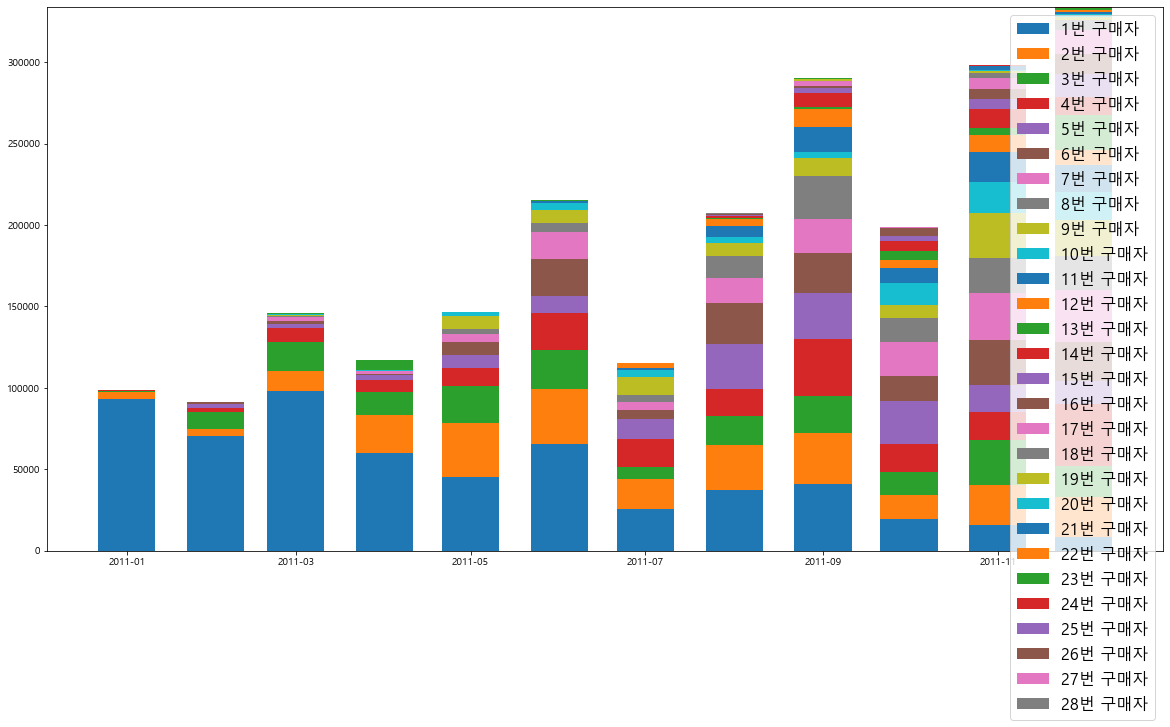

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
width=20
ax.bar(dff2011_2.columns, dff2011_2.iloc[0,:],width=width,label='1번 구매자')
for i in range(1,28) :
    ax.bar(dff2011_2.columns, dff2011_2.iloc[i,:], bottom=dff2011_2.iloc[0:i,:].sum(axis=0), width=width, label=f'{i+1}번 구매자')
    
plt.legend()
plt.show()

In [20]:
df.merge(df_user[['유저별 총 구매횟수']],on='Customer ID').to_csv('Globalsuperstore_add.csv', encoding='utf-8-sig')

## 4. 코호트 재구매율

In [21]:
df_rank_first = df[df['Rank']==1][['Customer ID','주문년도/월']]
df_rank_first

,Customer ID,주문년도/월
10,GM-14695,2011-04-01
22,JK-15325,2011-05-01
27,EB-14110,2011-03-01
35,AH-30,2011-09-01
39,DL-12865,2011-01-01
...,...,...
51197,SW-10275,2011-04-01
51225,LS-7230,2011-11-01
51226,JK-6120,2011-07-01
51231,MH-18115,2011-08-01


In [22]:
df_total = pd.merge(df,df_rank_first,on=['Customer ID'])
df_total = df_total[['Customer ID','주문년도/월_x','주문년도/월_y']]

In [23]:
df_total

,Customer ID,주문년도/월_x,주문년도/월_y
0,RH-19495,2012-07-01,2011-05-01
1,RH-19495,2012-07-01,2011-05-01
2,RH-19495,2013-05-01,2011-05-01
3,RH-19495,2013-09-01,2011-05-01
4,RH-19495,2014-10-01,2011-05-01
...,...,...,...
106303,BD-1500,2013-11-01,2011-12-01
106304,BD-1500,2013-07-01,2011-12-01
106305,RC-9825,2012-12-01,2012-12-01
106306,MG-7890,2013-12-01,2013-12-01


In [24]:
df_total.columns = ['Customer ID','Order Date','First 0rder Date']
df_total

,Customer ID,Order Date,First 0rder Date
0,RH-19495,2012-07-01,2011-05-01
1,RH-19495,2012-07-01,2011-05-01
2,RH-19495,2013-05-01,2011-05-01
3,RH-19495,2013-09-01,2011-05-01
4,RH-19495,2014-10-01,2011-05-01
...,...,...,...
106303,BD-1500,2013-11-01,2011-12-01
106304,BD-1500,2013-07-01,2011-12-01
106305,RC-9825,2012-12-01,2012-12-01
106306,MG-7890,2013-12-01,2013-12-01


In [25]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106308 entries, 0 to 106307
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       106308 non-null  object        
 1   Order Date        106308 non-null  datetime64[ns]
 2   First 0rder Date  106308 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 3.2+ MB


In [26]:
df_total['First 0rder Date'].dt.to_period('Q')

0         2011Q2
1         2011Q2
2         2011Q2
3         2011Q2
4         2011Q2
           ...  
106303    2011Q4
106304    2011Q4
106305    2012Q4
106306    2013Q4
106307    2014Q2
Name: First 0rder Date, Length: 106308, dtype: period[Q-DEC]

In [27]:
df_total.head(40)

,Customer ID,Order Date,First 0rder Date
0,RH-19495,2012-07-01,2011-05-01
1,RH-19495,2012-07-01,2011-05-01
2,RH-19495,2013-05-01,2011-05-01
3,RH-19495,2013-09-01,2011-05-01
4,RH-19495,2014-10-01,2011-05-01
5,RH-19495,2013-09-01,2011-05-01
6,RH-19495,2014-01-01,2011-05-01
7,RH-19495,2014-01-01,2011-05-01
8,RH-19495,2012-06-01,2011-05-01
9,RH-19495,2011-05-01,2011-05-01


In [29]:
ts = df_total['Order Date'].dt.to_period('Q')- df_total['First 0rder Date'].dt.to_period('Q')

for i in range(len(ts)) :
    ts[i] =str(ts[i]).split('<')[1].split('*')[0].strip()
ts

ts2 = ts.to_frame()
ts2.columns=['Quarter Diff']
ts2.head(100)

,Quarter Diff
0,5
1,5
2,8
3,9
4,14
...,...
95,5
96,5
97,0
98,0


In [30]:
for i in range(len(ts2)) :
    if ts2.iloc[i,:].values not in ['0','2','3','4','5','6','7','8','9','10','11','12','13','14','15'] :
        ts2.iloc[i,:] = 1
ts2 = ts2.apply(pd.to_numeric)
ts2.head(30)

,Quarter Diff
0,5
1,5
2,8
3,9
4,14
5,9
6,11
7,11
8,4
9,0


In [31]:
df_total['Order Date'] = df_total['Order Date'].dt.to_period('Q')
df_total['First 0rder Date'] = df_total['First 0rder Date'].dt.to_period('Q')
df_total2 = pd.concat([df_total, ts2], axis=1)
df_total2

,Customer ID,Order Date,First 0rder Date,Quarter Diff
0,RH-19495,2012Q3,2011Q2,5
1,RH-19495,2012Q3,2011Q2,5
2,RH-19495,2013Q2,2011Q2,8
3,RH-19495,2013Q3,2011Q2,9
4,RH-19495,2014Q4,2011Q2,14
...,...,...,...,...
106303,BD-1500,2013Q4,2011Q4,8
106304,BD-1500,2013Q3,2011Q4,7
106305,RC-9825,2012Q4,2012Q4,0
106306,MG-7890,2013Q4,2013Q4,0


In [32]:
grouped3 = df_total2.groupby(['First 0rder Date','Quarter Diff'])
grouped3

In [33]:
# 각 유저별로 구한다,.
cohort_q = grouped3['Customer ID'].nunique()
cohort_q.head(30)

First 0rder Date  Quarter Diff
2011Q1            0               512
                  1               275
                  2               302
                  3               351
                  4               234
                  5               315
                  6               340
                  7               359
                  8               271
                  9               358
                  10              383
                  11              391
                  12              319
                  13              397
                  14              409
                  15              434
2011Q2            0               408
                  1               204
                  2               247
                  3               181
                  4               228
                  5               235
                  6               273
                  7               214
                  8               259
                  9

In [34]:
cohort_q2 = cohort_q.to_frame()
cohort_q2.reset_index(inplace=True)
cohort_q2

,First 0rder Date,Quarter Diff,Customer ID
0,2011Q1,0,512
1,2011Q1,1,275
2,2011Q1,2,302
3,2011Q1,3,351
4,2011Q1,4,234
...,...,...,...
130,2014Q2,0,7
131,2014Q2,1,4
132,2014Q2,2,4
133,2014Q3,0,2


In [35]:
cohort_q2 = cohort_q2.pivot(index='First 0rder Date', columns='Quarter Diff')
cohort_q2

Customer ID                                                   \
Quarter Diff              0      1      2      3      4      5      6      7    
First 0rder Date                                                                
2011Q1                 512.0  275.0  302.0  351.0  234.0  315.0  340.0  359.0   
2011Q2                 408.0  204.0  247.0  181.0  228.0  235.0  273.0  214.0   
2011Q3                 253.0  129.0   90.0  122.0  140.0  133.0  112.0  140.0   
2011Q4                 136.0   48.0   56.0   66.0   60.0   53.0   63.0   73.0   
2012Q1                  57.0   15.0   17.0   18.0   15.0   18.0   26.0   23.0   
2012Q2                  56.0   18.0   14.0   13.0   19.0   14.0   19.0   19.0   
2012Q3                  58.0   20.0   10.0   15.0   19.0   26.0   16.0   29.0   
2012Q4                  39.0   10.0   13.0   16.0   15.0   13.0   16.0   19.0   
2013Q1                  19.0    6.0    7.0    6.0    7.0    7.0   12.0    8.0   
2013Q2                  15.0    3.0    5.0    4.0    6.0    9.0    7.0    NaN   
2013Q3                  15.0   10.0    7.0    6.0    7.0    5.0    NaN    NaN   
2013Q4                   7.0    2.0    3.0    2.0    3.0    NaN    NaN    NaN   
2014Q1                   6.0    4.0    3.0    5.0    NaN    NaN    NaN    NaN   
2014Q2                   7.0    4.0    4.0    NaN    NaN    NaN    NaN    NaN   
2014Q3                   2.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                          
Quarter Diff         8      9      10     11     12     13     14     15  
First 0rder Date                                                          
2011Q1            271.0  358.0  383.0  391.0  319.0  397.0  409.0  434.0  
2011Q2            259.0  285.0  281.0  252.0  282.0  300.0  320.0    NaN  
2011Q3            165.0  156.0  131.0  158.0  162.0  175.0    NaN    NaN  
2011Q4             74.0   54.0   76.0   85.0   91.0    NaN    NaN    NaN  
2012Q1             21.0   26.0   29.0   30.0    NaN    NaN    NaN    NaN  
2012Q2             23.0   28.0   25.0    NaN    NaN    NaN    NaN    NaN  
2012Q3             29.0   27.0    NaN    NaN    NaN    NaN    NaN    NaN  
2012Q4             19.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2013Q1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2013Q2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2013Q3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2013Q4              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2014Q1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2014Q2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2014Q3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [36]:
# 확률 계산
user_retention = cohort_q2.div(cohort_q2.iloc[:,0], axis=0)
user_retention

Customer ID                                          \
Quarter Diff              0         1         2         3         4    
First 0rder Date                                                       
2011Q1                   1.0  0.537109  0.589844  0.685547  0.457031   
2011Q2                   1.0  0.500000  0.605392  0.443627  0.558824   
2011Q3                   1.0  0.509881  0.355731  0.482213  0.553360   
2011Q4                   1.0  0.352941  0.411765  0.485294  0.441176   
2012Q1                   1.0  0.263158  0.298246  0.315789  0.263158   
2012Q2                   1.0  0.321429  0.250000  0.232143  0.339286   
2012Q3                   1.0  0.344828  0.172414  0.258621  0.327586   
2012Q4                   1.0  0.256410  0.333333  0.410256  0.384615   
2013Q1                   1.0  0.315789  0.368421  0.315789  0.368421   
2013Q2                   1.0  0.200000  0.333333  0.266667  0.400000   
2013Q3                   1.0  0.666667  0.466667  0.400000  0.466667   
2013Q4                   1.0  0.285714  0.428571  0.285714  0.428571   
2014Q1                   1.0  0.666667  0.500000  0.833333       NaN   
2014Q2                   1.0  0.571429  0.571429       NaN       NaN   
2014Q3                   1.0  0.500000       NaN       NaN       NaN   

                                                                              \
Quarter Diff            5         6         7         8         9         10   
First 0rder Date                                                               
2011Q1            0.615234  0.664062  0.701172  0.529297  0.699219  0.748047   
2011Q2            0.575980  0.669118  0.524510  0.634804  0.698529  0.688725   
2011Q3            0.525692  0.442688  0.553360  0.652174  0.616601  0.517787   
2011Q4            0.389706  0.463235  0.536765  0.544118  0.397059  0.558824   
2012Q1            0.315789  0.456140  0.403509  0.368421  0.456140  0.508772   
2012Q2            0.250000  0.339286  0.339286  0.410714  0.500000  0.446429   
2012Q3            0.448276  0.275862  0.500000  0.500000  0.465517       NaN   
2012Q4            0.333333  0.410256  0.487179  0.487179       NaN       NaN   
2013Q1            0.368421  0.631579  0.421053       NaN       NaN       NaN   
2013Q2            0.600000  0.466667       NaN       NaN       NaN       NaN   
2013Q3            0.333333       NaN       NaN       NaN       NaN       NaN   
2013Q4                 NaN       NaN       NaN       NaN       NaN       NaN   
2014Q1                 NaN       NaN       NaN       NaN       NaN       NaN   
2014Q2                 NaN       NaN       NaN       NaN       NaN       NaN   
2014Q3                 NaN       NaN       NaN       NaN       NaN       NaN   

                                                                    
Quarter Diff            11        12        13        14        15  
First 0rder Date                                                    
2011Q1            0.763672  0.623047  0.775391  0.798828  0.847656  
2011Q2            0.617647  0.691176  0.735294  0.784314       NaN  
2011Q3            0.624506  0.640316  0.691700       NaN       NaN  
2011Q4            0.625000  0.669118       NaN       NaN       NaN  
2012Q1            0.526316       NaN       NaN       NaN       NaN  
2012Q2                 NaN       NaN       NaN       NaN       NaN  
2012Q3                 NaN       NaN       NaN       NaN       NaN  
2012Q4                 NaN       NaN       NaN       NaN       NaN  
2013Q1                 NaN       NaN       NaN       NaN       NaN  
2013Q2                 NaN       NaN       NaN       NaN       NaN  
2013Q3                 NaN       NaN       NaN       NaN       NaN  
2013Q4                 NaN       NaN       NaN       NaN       NaN  
2014Q1                 NaN       NaN       NaN       NaN       NaN  
2014Q2                 NaN       NaN       NaN       NaN       NaN  
2014Q3                 NaN       NaN       NaN       NaN       NaN

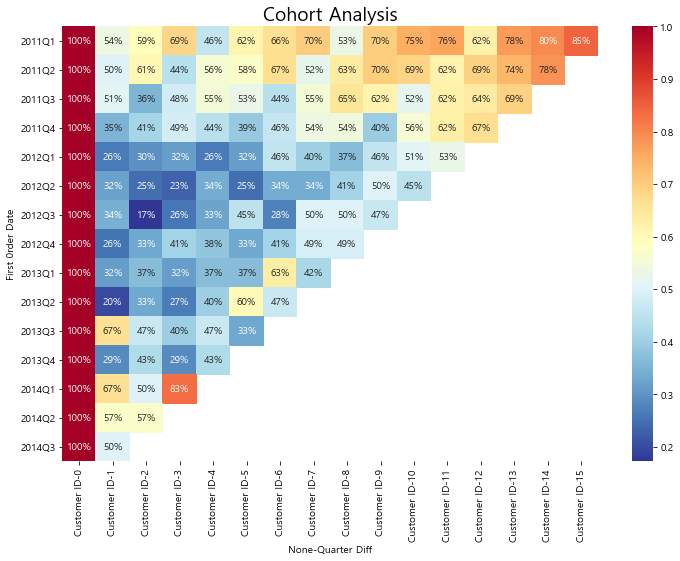

In [37]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('RdYlBu_r')
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap=cmap)
plt.show()